## Welcome to Week 4, Day 4

This is the start of an AWESOME project! Really simple and very effective.

In [28]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain_core.tools import Tool

from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [29]:
load_dotenv(override=True)

True

### Asynchronous LangGraph

To run a tool:  
Sync: `tool.run(inputs)`  
Async: `await tool.arun(inputs)`

To invoke the graph:  
Sync: `graph.invoke(state)`  
Async: `await graph.ainvoke(state)`

In [30]:
class State(TypedDict):
    
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [31]:
pushover_token = os.getenv("PUSHOVER_TOKEN")
pushover_user = os.getenv("PUSHOVER_USER")
pushover_url = "https://api.pushover.net/1/messages.json"

def push(text: str):
    """Send a push notification to the user"""
    requests.post(pushover_url, data = {"token": pushover_token, "user": pushover_user, "message": text})

tool_push = Tool(
        name="send_push_notification",
        func=push,
        description="useful for when you want to send a push notification"
    )

## Extra installation step - if you don't have Node and Playwright on your computer

Next, you need to install NodeJS and Playwright on your computer if you don't already have them. Please see instructions here:

[Node and Playwright setup](../setup/SETUP-node.md)

## And now - after Installing Playwright, a heads up for Windows PC Users:

While executing the next few cells, you might hit a problem with the Playwright browser raising a NotImplementedError.

This should work when we move to python modules, but it can cause problems in Windows in a notebook.

If you it this error and would like to run the notebook, you need to make a small change which seems quite hacky! You need to do this AFTER installing Playwright (prior cells)

1. Right click in `.venv` in the File Explorer on the left and select "Find in folder"
2. Search for `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())`  
3. That code should be found in a line of code in a file called `kernelapp.py`
4. Comment out the entire else clause that this line is a part of - see the fragment below. Be sure to have the "pass" statement after the ImportError line.
5. Restart the kernel by pressing the "Restart" button above

```python
        if sys.platform.startswith("win") and sys.version_info >= (3, 8):
            import asyncio
 
            try:
                from asyncio import WindowsProactorEventLoopPolicy, WindowsSelectorEventLoopPolicy
            except ImportError:
                pass
                # not affected
           # else:
            #    if type(asyncio.get_event_loop_policy()) is WindowsProactorEventLoopPolicy:
                    # WindowsProactorEventLoopPolicy is not compatible with tornado 6
                    # fallback to the pre-3.8 default of Selector
                    # asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())
```

Thank you to student Nicolas for finding this, and to Kalyan, Yaki, Zibin and Bhaskar for confirming that this worked for them! And to Vladislav for the extra pointers.

As an alternative, you can just move to a Python module (which we do anyway in Day 5)

In [32]:
# Introducing nest_asyncio
# Python async code only allows for one "event loop" processing aynchronous events.
# The `nest_asyncio` library patches this, and is used for special situations, if you need to run a nested event loop.

import nest_asyncio
nest_asyncio.apply()

### The LangChain community

One of the remarkable things about LangChain is the rich community around it.

Check this out:


In [33]:
from langchain_community.agent_toolkits import PlayWrightBrowserToolkit
from langchain_community.tools.playwright.utils import create_async_playwright_browser

# KHÔNG dùng nest_asyncio
# KHÔNG chạy trong notebook

async_browser = create_async_playwright_browser(headless=False)
toolkit = PlayWrightBrowserToolkit.from_browser(async_browser=async_browser)
playwright_tools = toolkit.get_tools()

for t in playwright_tools:
    print(t.name)


click_element
navigate_browser
previous_webpage
extract_text
extract_hyperlinks
get_elements
current_webpage


In [34]:
for tool in playwright_tools:
    print(f"{tool.name}={tool}")

click_element=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\AAL\AppData\Local\ms-playwright\chromium-1200\chrome-win64\chrome.exe> version=143.0.7499.4>
navigate_browser=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\AAL\AppData\Local\ms-playwright\chromium-1200\chrome-win64\chrome.exe> version=143.0.7499.4>
previous_webpage=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\AAL\AppData\Local\ms-playwright\chromium-1200\chrome-win64\chrome.exe> version=143.0.7499.4>
extract_text=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\AAL\AppData\Local\ms-playwright\chromium-1200\chrome-win64\chrome.exe> version=143.0.7499.4>
extract_hyperlinks=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\AAL\AppData\Local\ms-playwright\chromium-1200\chrome-win64\chrome.exe> version=143.0.7499.4>
get_elements=async_browser=<Browser type=<BrowserType n

In [35]:
tool_dict = {tool.name: tool for tool in playwright_tools}

navigate_tool = tool_dict.get("navigate_browser")
extract_text_tool = tool_dict.get("extract_text")

# Navigate với cấu hình nhẹ hơn
await navigate_tool.arun({
    "url": "https://gamek.vn",
    "wait_until": "domcontentloaded",   # không chờ load full JS
    "timeout": 60000,                  # tăng timeout
    "user_agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/120"
})

# Trích xuất text sau khi DOM sẵn sàng
text = await extract_text_tool.arun({})


In [36]:
import textwrap
print(textwrap.fill(text))

Kênh tin Game lớn nhất, thư viện Game đầy đủ nhất GAME MOBILE eSPORTS
KHÁM PHÁ MANGA/FILM HÓNG CỘNG ĐỒNG GUNNY ORIGIN LMHT LIÊN QUÂN MOBILE
LMHT: TỐC CHIẾN GAMING GEAR GAME ONLINE PC/CONSOLE 360° GAMEFI GAME
MOBILE eSPORTS KHÁM PHÁ MANGA/FILM HÓNG CỘNG ĐỒNG 360° GAMEFI Ads by
Admatic Game thủ chơi gì Một năm qua, Apple Arcade đã mang đến cho
game thủ những “món quà” gì? Lịch thi đấu LCK Cup 2026 mới nhất: Chờ
đợi "Siêu kinh điển" tuần ra quân Liên Minh Huyền Thoại Gumayusi lần
đầu nói về cảm giác khi ngồi dự bị khiến fan càng thêm xót xa Tựa game
nhập vai sinh tồn mới ra mắt trên Steam cho người dùng chơi thử miễn
phí, 90% rating tích cực Liên Minh Huyền Thoại Keria khen ngợi đồng
đội cũ hết lời nhưng vẫn không quên "người mới" của T1 Manga/Film Giật
mình nhìn lại: 10 siêu phẩm đình đám này đã chính thức bước sang tuổi
thứ 10 trong năm 2026 Manga/Film Vừa lên sóng đầu năm 2026, siêu phẩm
anime này đã sớm "đặt gạch" cho ngôi vị xuất sắc nhất năm Liên Minh
Huyền Thoại Xuất hiện nghi vấn 

In [37]:
all_tools = playwright_tools + [tool_push]

In [38]:

llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(all_tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


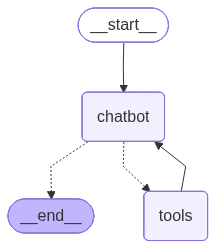

In [39]:

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=all_tools))
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "10"}}

async def chat(user_input: str, history):
    result = await graph.ainvoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

d:\AILearning\agents\venv\Lib\site-packages\uvicorn\server.py:67: RuntimeWarning: coroutine 'Server.serve' was never awaited
  return asyncio_run(self.serve(sockets=sockets), loop_factory=self.config.get_loop_factory())
Exception in thread Thread-46 (run):
Traceback (most recent call last):
  File "C:\Users\AAL\AppData\Roaming\uv\python\cpython-3.12.12-windows-x86_64-none\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\AAL\AppData\Roaming\uv\python\cpython-3.12.12-windows-x86_64-none\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "d:\AILearning\agents\venv\Lib\site-packages\uvicorn\server.py", line 67, in run
    return asyncio_run(self.serve(sockets=sockets), loop_factory=self.config.get_loop_factory())
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _patch_asyncio.<locals>.run() got an unexpected keyword argument 'loop_factory'
Exception in thread T

KeyboardInterrupt: 

Exception in thread Thread-50 (run):
Traceback (most recent call last):
  File "C:\Users\AAL\AppData\Roaming\uv\python\cpython-3.12.12-windows-x86_64-none\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\AAL\AppData\Roaming\uv\python\cpython-3.12.12-windows-x86_64-none\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "d:\AILearning\agents\venv\Lib\site-packages\uvicorn\server.py", line 67, in run
    return asyncio_run(self.serve(sockets=sockets), loop_factory=self.config.get_loop_factory())
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _patch_asyncio.<locals>.run() got an unexpected keyword argument 'loop_factory'
Exception in thread Thread-51 (run):
Traceback (most recent call last):
  File "C:\Users\AAL\AppData\Roaming\uv\python\cpython-3.12.12-windows-x86_64-none\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\AAL\